- competition/dataset : [https://www.kaggle.com/zalando-research/fashionmnist](https://www.kaggle.com/zalando-research/fashionmnist)
- date : 2021/02/17
- original : [https://www.kaggle.com/bugraokcu/cnn-with-keras](https://www.kaggle.com/bugraokcu/cnn-with-keras)

## CNN with Keras

**✏ 필사 1회** 

### Brief Info
여기서는 [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)의 가이드라인대로 keras를 사용하여 CNN 분류기를 학습해볼 것입니다.  

우리의 전략은 분류기를 최적화하기 위해 트레이닝 데이터의 20%를 검증용 셋으로 사용하며, 테스트 데이터는 최종적으로 확인한 적 없는 데이터로 모델의 정확도를 평가하기 위해 그대로 둡니다.  

In [15]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('data/fashion-mnist_train.csv')
data_test = pd.read_csv('data/fashion-mnist_test.csv')

input_shape = (28, 28, 1)

x = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here we split validation data to optimize classifier during training
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=13)

# Test data
x_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test /= 255
x_val /= 255

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

##### Training

In [18]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 35s 182ms/step - loss: 1.2105 - accuracy: 0.5503 - val_loss: 0.5080 - val_accuracy: 0.8067
Epoch 2/50
188/188 [==============================] - 31s 165ms/step - loss: 0.5432 - accuracy: 0.7975 - val_loss: 0.4318 - val_accuracy: 0.8426
Epoch 3/50
188/188 [==============================] - 29s 154ms/step - loss: 0.4609 - accuracy: 0.8312 - val_loss: 0.3777 - val_accuracy: 0.8649
Epoch 4/50
188/188 [==============================] - 28s 148ms/step - loss: 0.4103 - accuracy: 0.8503 - val_loss: 0.3343 - val_accuracy: 0.8835
Epoch 5/50
188/188 [==============================] - 28s 151ms/step - loss: 0.3781 - accuracy: 0.8607 - val_loss: 0.3161 - val_accuracy: 0.8854
Epoch 6/50
188/188 [==============================] - 28s 151ms/step - loss: 0.3554 - accuracy: 0.8709 - val_loss: 0.3108 - val_accuracy: 0.8834
Epoch 7/50
188/188 [==============================] - 29s 154ms/step - loss: 0.3383 - accuracy: 0.8759 - val_loss: 0.2965 - val_ac

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20025859773159027
Test accuracy: 0.9286999702453613


##### Results

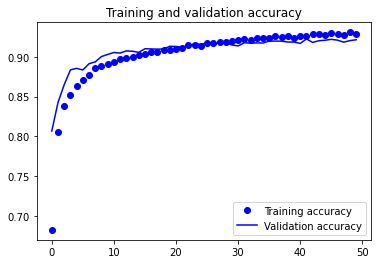

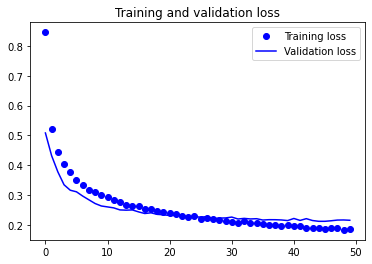

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### Classification Report

In [55]:
# get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(list(predicted_classes == y_true))[0]
incorrect = np.nonzero(list(predicted_classes != y_true))[0]

C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
from sklearn.metrics import classification_report
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.90      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.87      0.89      1000
     Class 3       0.91      0.96      0.93      1000
     Class 4       0.90      0.88      0.89      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.80      0.77      0.78      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



class 6의 정밀도와 재현율 부분에서 실적이 저조한 것이 보입니다. class 2의 경우, 분류기는 정밀도가 약간 부족한 반면 class 4에서는 재현율이 부족합니다.  

아마 정확한 예측과 부정확한 예측을 시각화해보면 더 많은 인사이트를 얻을 수 있을 것입니다.

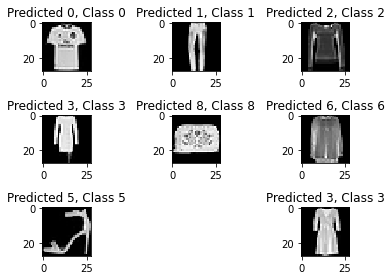

In [73]:
for i, cor in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[cor].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[cor], y_true[cor]))
    plt.tight_layout()

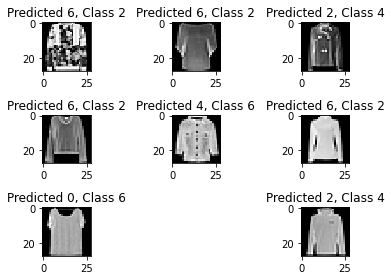

In [74]:
for i, incor in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incor].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incor], y_true[incor]))
    plt.tight_layout()

CNN이 로버스트한 아키텍처임에도 불구하고 여러 클래스에 나타나는 유사한 패턴의 다양성이 분류기의 성능에 영향을 주는 것으로 보입니다. 재킷, 셔츠, 긴팔 블라우스는 유사한 패턴을 가지고 있습니다. (긴팔 유무, 버튼 유무 등)  

이 정보는 Chollet, F (2017)에 의한 것으로, 입력 데이터를 넣고 conv layer의 활성을 시각화하는 것입니다.

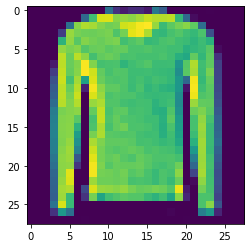

In [75]:
test_im = x_train[154]
plt.imshow(test_im.reshape(28, 28), cmap='viridis', interpolation='none')
plt.show()

첫 번째 레이어의 두 번째 채널의 활성을 살펴봅시다:

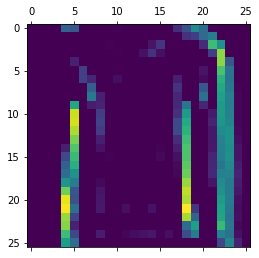

In [79]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1, 28, 28, 1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

다른 conv layer들의 활성도 시각화해보겠습니다.

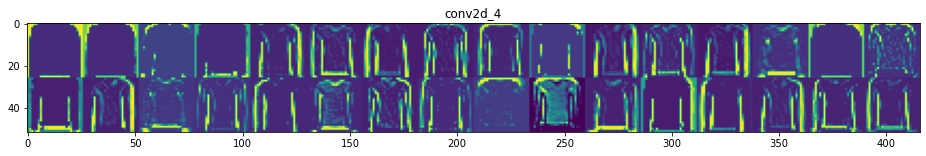

<ipython-input-80-de420d14e139>:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


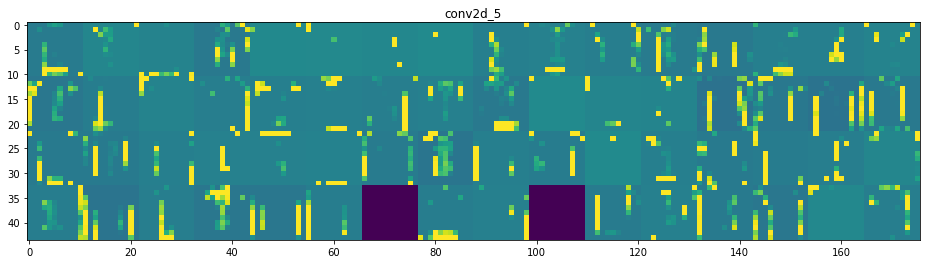

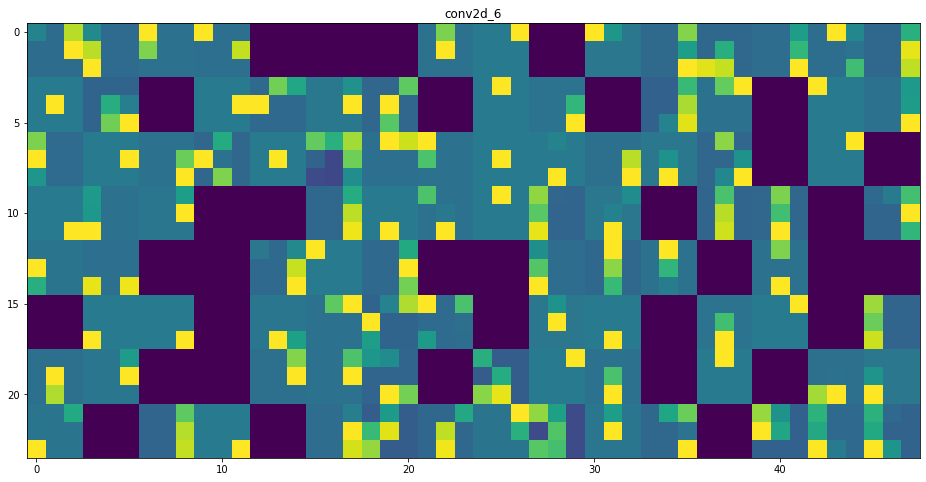

In [80]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size*n_cols, images_per_row*size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col*images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col*size: (col+1)*size, row*size: (row+1)*size] = channel_image
        
        scale = 1. / size
        plt.figure(figsize=(scale*display_grid.shape[1],
                            scale*display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()